## Thompson Beta

In [1]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../")

from lib.envs.bandits.bandit import BanditEnv
from lib.simulation import Experiment
from lib.envs.bandits.policy import Policy
from lib.utils import randargmax

%load_ext autoreload
%autoreload 2

In [2]:
class ThompsonBeta(Policy):
    def __init__(self, num_actions):
        Policy.__init__(self, num_actions)
        #PRIOR Hyper-params: successes = 1; failures = 1
        self.total_counts = np.zeros(num_actions, dtype = np.longdouble)
        self.name = "Thompson Beta"
        
        self.successes = np.ones(num_actions, dtype = np.int)
        self.failures = np.ones(num_actions, dtype = np.int)
        
    def act(self):
        current_action = np.argmax(np.random.beta(1 + self.successes, 1 + self.failures))
        return current_action
    
    def feedback(self, action, reward):
        if reward > 0:
            self.successes[action] += 1
        else:
            self.failures[action] += 1
        self.total_counts[action] += 1

Distribution: normal [-0.69033324 -0.04908517  1.48175334  0.21723857 -0.03821807  0.28498122
 -0.89833314 -0.65836677  0.94271554 -1.56356622]
Optimal action: 2


<Figure size 720x360 with 0 Axes>

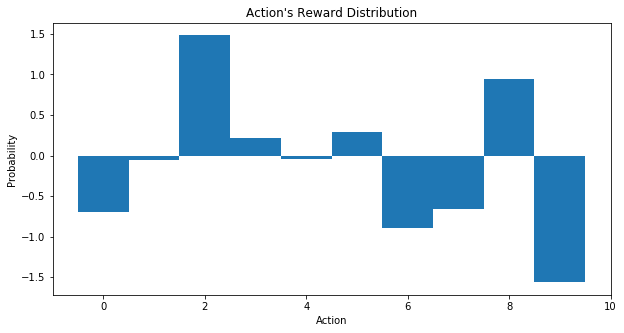

--------------------------------------------------
Policy: Thompson Beta 
Average Reward: 1.4036114530083719 
Average Regret: 0.06686694506082004
Arm pulls: [3.00e+00 3.00e+00 9.29e+03 2.10e+01 4.00e+00 3.78e+02 2.00e+00 1.00e+00
 2.96e+02 2.00e+00]


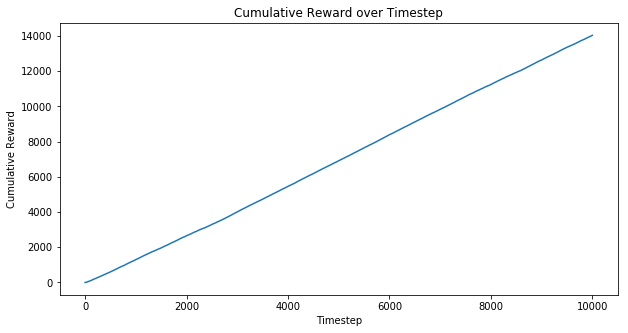

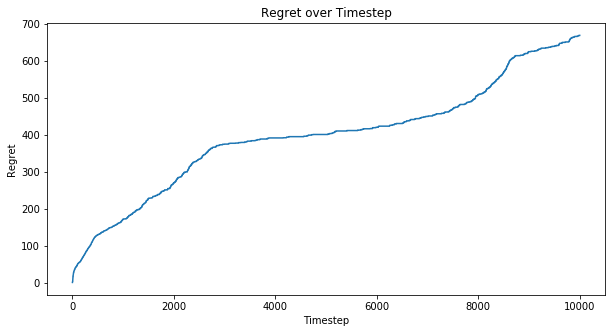

In [22]:
evaluation_seed = None
num_actions = 10
trials = 10000
distribution = "normal"
env = BanditEnv(num_actions, distribution, evaluation_seed)
agent = ThompsonBeta(num_actions)
experiment = Experiment(env, agent)
experiment.run_bandit(trials)